# Predicting Bank Churn

## Import Packages and Data

In this section, the Python packages and dataframe are read into Python.

In [110]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [95]:
# Import data
try:
    churn = pd.read_csv('Users/kellyshreeve/Desktop/Data-Sets/Churn.csv')
except:
    churn = pd.read_csv('/datasets/Churn.csv')

In [96]:
# Print info
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [97]:
# Print top 15 rows
display(churn.head(15))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


## Clean and Prepare Data

The data are cleaned for analysis by addressing variable names, data types, missing values, and duplicates. Then, two versions of the dataset are created with variables prepared seperately for Logistic Regression and Decision Tree Classification models. For Logistic Regression, categorical features are encoded with One Hot Encoding and continuous features are scaled. For Decision Tree Classification, categorical features are label encoded and continuous features are left in their normal scales.

### Convert Variable Names to Snake Case

In [98]:
# Convert column names to lower case
churn.columns = churn.columns.str.lower()

print(churn.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [99]:
# Insert underscore in multi-word column names
churn = churn.rename(columns={'rownumber':'row_number', 'customerid':'customer_id',
                              'creditscore':'credit_score', 'numofproducts':'num_of_products',
                              'hascrcard':'has_cr_card', 'isactivemember':'is_active_member',
                              'estimatedsalary':'estimated_salary'})

print(churn.columns)
display(churn.head())

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


All column names are converted to snake case.

### Check Data Types

In [100]:
# Check data types
print(churn.dtypes)

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object


All data types are correct.

### Address Missing Values

In [101]:
# Find missing values
print('Number of missing values by variable:')
print()
print(churn.isna().sum())

Number of missing values by variable:

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


Tenure is missing 909 values. All other variables have complete information.

In [102]:
# Calculate percentage of missing values in Tenure
missing_percent = (churn['tenure'].isna().sum()/len(churn['tenure'])) * 100

print(f'Percent missing in tenure: {missing_percent:.2f}%')

Percent missing in tenure: 9.09%


Tenure is missing less than 10%, so imputation will be performed.

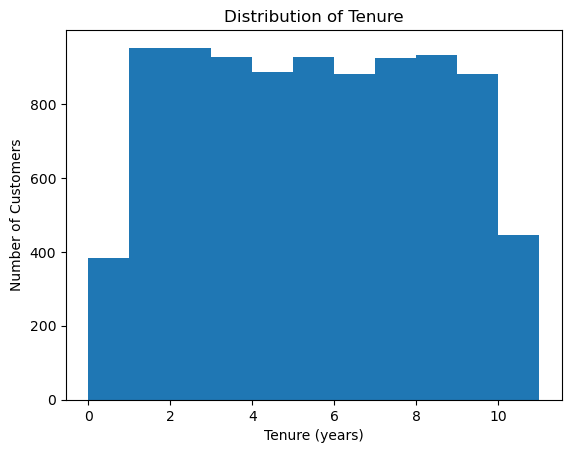

In [103]:
# Check distribution of tenure with a histogram
churn['tenure'].plot(kind='hist', bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.title('Distribution of Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Customers')

plt.show()

The distribtuion of Tenure is largely uniformly distributed with a drop off in number of customers with tenures of 0-1 years and 9-10 years. Because the distribution is symmetrical and the tenure lengths are discrete numbers, the best method of imputation is to use the median of tenure.

In [104]:
# Replace missing Tenure values with the median of Tenure
churn['tenure'] = churn['tenure'].fillna(churn['tenure'].median())

# Frequency distribution of tenures after imputation
print('Frequency Distribution of Tenure after imputation:')
display(churn['tenure'].value_counts()
        .reset_index()
        .rename(columns={'tenure':'count', 'index':'tenure'})
        .sort_values(by='tenure')
        .reset_index(drop=True))

Frequency Distribution of Tenure after imputation:


,tenure,count
0,0.0,382
1,1.0,952
2,2.0,950
3,3.0,928
4,4.0,885
5,5.0,1836
6,6.0,881
7,7.0,925
8,8.0,933
9,9.0,882


In [105]:
# Re-run missing value counts
print('Missing values after imputation:')

display(churn.isna().sum())

Missing values after imputation:


row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

After imputation, all variables now have complete information.

### Check for Duplicates

In [106]:
# Check for fully duplicated rows
full_duplicates = churn.duplicated().sum()

print(f'Number of fully duplicated rows: {full_duplicates}')

Number of fully duplicated rows: 0


There are no fully duplicated rows.

In [107]:
# Check for implicit duplicates in geography
print(churn['geography'].unique())

['France' 'Spain' 'Germany']


There are no implicit duplicates in geography.

In [108]:
# Check for implicit duplicates in gender
print(churn['gender'].unique())

['Female' 'Male']


There are no implicit duplicates in gender. 

### Logistic Regression Variable Preparation

#### One Hot Encoding for Categorical Features

In [109]:
# Create dataframe with one hot encoded categorical variables
churn_ohe = pd.get_dummies(churn, columns=['geography', 'gender'], drop_first=True)

display(churn_ohe.head())

,row_number,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


#### Feature Scaling for Numeric Features

In [111]:
# Scale numeric features
features = churn_ohe.drop('row_number', 'customer_id', 'surname', 'exited')

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features[numeric])

features[numeric] = scaler.transform(features[numeric])

display(churn_ohe.head())

/var/folders/q7/2k38l43j455fh7f8t9_wlj240000gn/T/ipykernel_74005/3543452904.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = churn_ohe.drop('row_number', 'customer_id', 'surname', 'exited')


ValueError: Cannot specify both 'labels' and 'index'/'columns'

### Decision Tree/Random Forest Variable Preparation

#### Label Encoding for Categorical Variables

### Data Preparation Conclusion

## Train Model with Imbalance

In [2]:
# Check balance of classes

In [3]:
# Split data into train, validate, test 

In [4]:
# Train Classification Decision Tree & calculate F1

In [5]:
# Train Classification Random Forest & calculate F1

In [ ]:
# Train Logistic Regression & calculate F1

### Imbalanced Model Training Conclusion

## Improve the Quality of the Model by Addressing Class Imbalance

### Address class imbalance with A

In [7]:
# Re-fit the Classification Decision Tree

In [ ]:
# Re-fit the Classification Random Forest

In [ ]:
# Re-fit the Classification Logistic Regression

### Address class imbalance with B

In [ ]:
# Re-fit the Classification Decision Tree

In [ ]:
# Re-fit the Classification Random Forest

In [ ]:
# Re-fit the Classification Logistic Regression

### Class Balanced Model Conclusions

## Final Testing

In [ ]:
# Test the model on the test set

### Final Testing Conclusion

## Conclusion and Business Application